In [61]:
''' we are impoting libraries
#pandas for analysing cleaning and modifying data set
#numpy is used for matrices ,arrays,fourier transforms etc
matplotlib.pyplot is used for ploting graphs in python
sklearn >> helps in dev models
metrics used for confusion matrix
'''
import pandas as pd
import numpy as np
from sklearn import metrics
%matplotlib inline
import matplotlib.pyplot as plt

In [62]:
url = 'https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv'
df=pd.read_csv(url)
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [63]:
series_shifted =df['Close'].shift()
df['Prev close'] = series_shifted
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Prev close
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,NaN
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,233.75
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,233.25
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,234.25
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,236.10


In [64]:
df.shape

(2035, 9)

In [65]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
Prev close              1
dtype: int64

In [66]:
#for removing data with null value
df.dropna(inplace = True)
df

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Prev close
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,233.75
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,233.25
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,234.25
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,236.10
5,2018-09-21,235.00,237.00,227.95,233.75,234.60,5395319,12589.59,233.30
...,...,...,...,...,...,...,...,...,...
2030,2010-07-27,117.60,119.50,112.00,118.80,118.65,586100,694.98,118.25
2031,2010-07-26,120.10,121.00,117.10,117.10,117.60,658440,780.01,118.65
2032,2010-07-23,121.80,121.95,120.25,120.35,120.65,281312,340.31,117.60
2033,2010-07-22,120.30,122.00,120.25,120.75,120.90,293312,355.17,120.65


<Axes: >

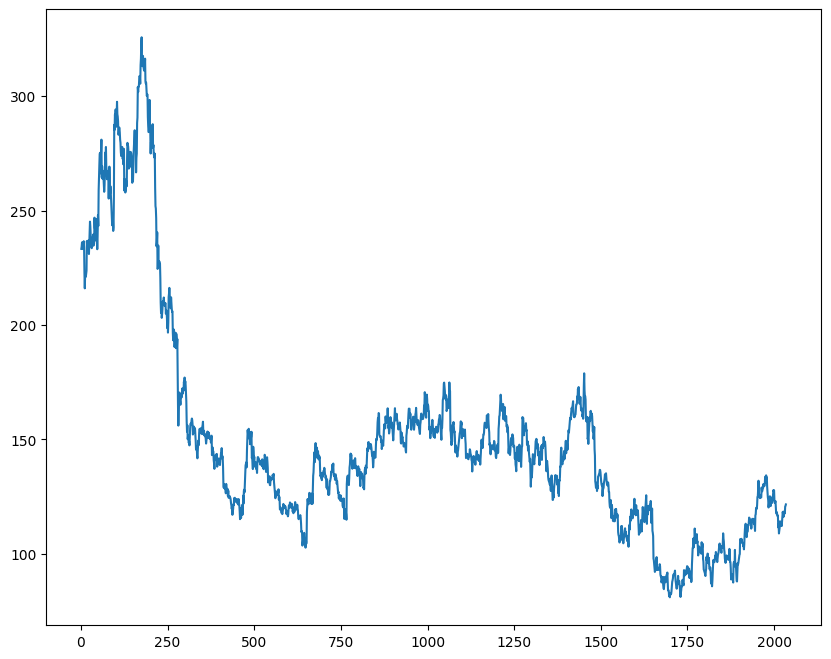

In [67]:
#ploting closing prices
df['Close'].plot(figsize=(10,8))

In [68]:
x = df[['Open','Prev close']]
y = df['Close']

In [69]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=0)

In [70]:
print(x_train.shape, x_test.shape)

(1525, 2) (509, 2)


In [73]:
#Linear regression

from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, accuracy_score

regressor  = LinearRegression()
regressor.fit (x_train, y_train)

LinearRegression()

In [74]:
print(regressor.coef_)
print(regressor.intercept_)

[0.49293586 0.50700575]
-0.17476281547763506


In [77]:
predicted = regressor.predict(x_test)
print(x_test)

        Open  Prev close
705   133.00      134.95
1201  149.00      145.35
1167  157.00      157.10
1246  152.20      152.15
1560  113.70      112.05
...      ...         ...
32    236.65      233.55
924   151.95      148.45
2027  116.50      117.30
1628  120.70      116.00
1695   84.00       83.95

[509 rows x 2 columns]


In [78]:
_df = pd.DataFrame({"actual" : y_test, "predicted" : predicted})
print(_df)

      actual   predicted
705   134.35  133.806133
1201  144.55  146.965966
1167  156.50  156.866771
1246  150.75  151.991000
1560  110.85  112.682039
...      ...         ...
32    237.30  234.889702
924   148.15  149.991845
2027  116.05  116.724040
1628  120.40  118.135263
1695   84.10   83.794982

[509 rows x 2 columns]


In [79]:
regressor.score(x_test,y_test)

0.9976351259844358

In [81]:
import math
print("mean absolute error", metrics.mean_absolute_error(y_test,predicted))
print("mean square error", metrics.mean_squared_error(y_test,predicted))
print("root mean  error", math.sqrt(metrics.mean_squared_error(y_test,predicted)))

mean absolute error 1.6797679406363946
mean square error 5.499072687376385
root mean  error 2.3450101678620467


In [82]:
predicted2 = regressor.predict(x)
print(predicted2)

[233.95593768 236.38893525 233.59327073 ... 119.48870137 120.29566512
 121.30970111]


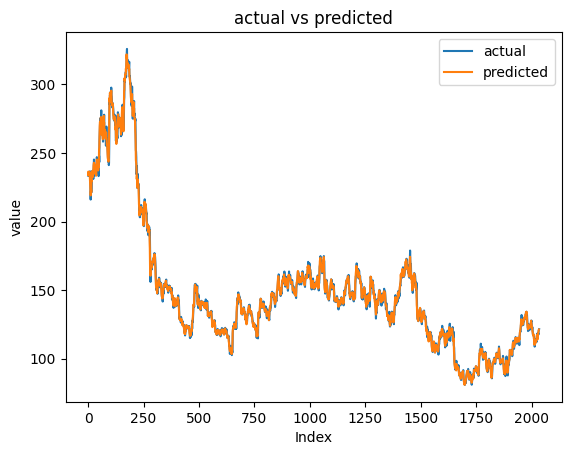

In [84]:
plt.plot(y,label ="actual")
plt.plot(predicted2,label= "predicted")
plt.xlabel("Index")
plt.ylabel("value")
plt.title("actual vs predicted")
plt.legend()
plt.show()